# 연령별취업자수관계

In [1]:
# <mark></mark> 사이에 넣으면 형광펜 그어준다~!

- 국가통계포털 에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기
  <hr>
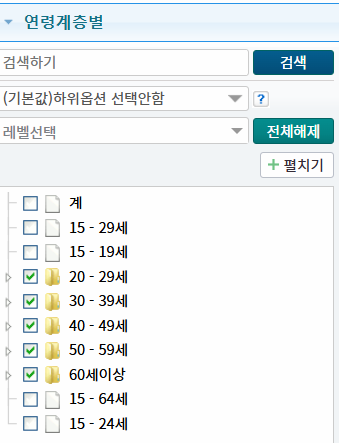
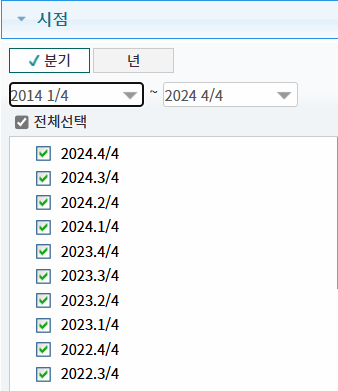
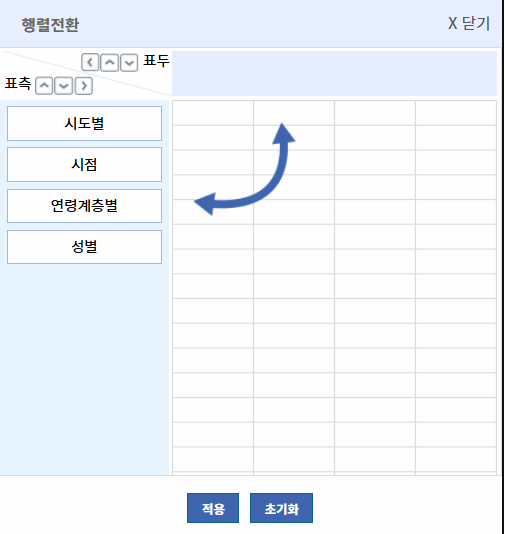

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

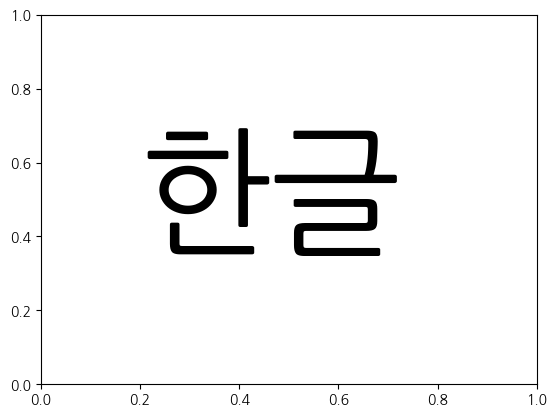

In [3]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [4]:
import pandas as pd
file_path = "./data ref/행정구역_시도__성_연령별_취업자.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [5]:
# 세종시의 인구를 미리 처리해두자 ~ : 인구수가 집계되지 않음

In [6]:
ex_data = ori.copy()
ex_data.columns = ['region','year','age','gender','value'] # 컬럼 이름 일괄 교체 !!
ex_data.loc[ex_data['region']=='세종특별자치시','value']=ex_data.loc[ex_data['region']=='세종특별자치시','value'].replace('-',0)
# ex_data.loc[ex_data['region']=='세종특별자치시','value']

In [7]:
# cf) 남자와 여자로 분리하기.
m_data = ex_data.loc[ex_data['gender']=='남자']
m_data

,region,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
2,서울특별시,2014.1/4,30 - 39세,남자,774
4,서울특별시,2014.1/4,40 - 49세,남자,773
6,서울특별시,2014.1/4,50 - 59세,남자,664
8,서울특별시,2014.1/4,60세이상,남자,352
...,...,...,...,...,...
7430,제주도,2024.4/4,20 - 29세,남자,19
7432,제주도,2024.4/4,30 - 39세,남자,38
7434,제주도,2024.4/4,40 - 49세,남자,51
7436,제주도,2024.4/4,50 - 59세,남자,54


In [8]:
ex_data['value']= ex_data['value'].astype(int)   # 혹시 계산 알 될까봐 숫자로 바꿔줬음 !!
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")

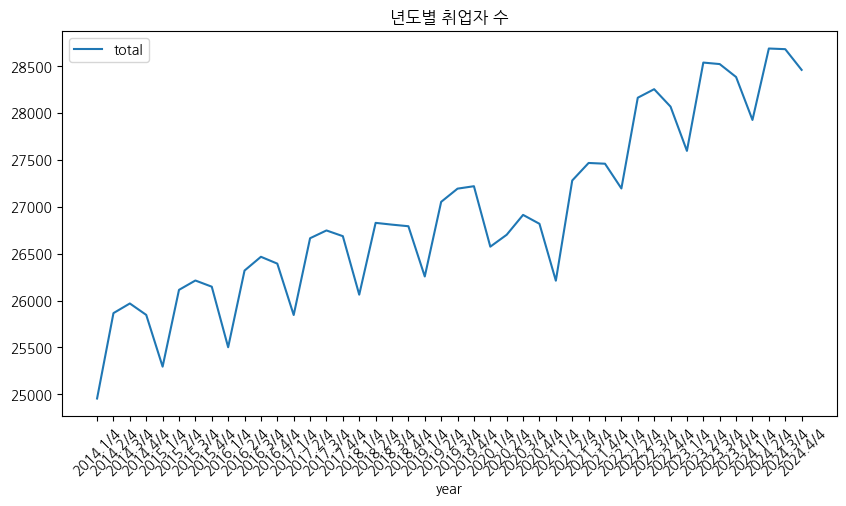

In [9]:
ax = ex1_data.plot(x="year", y= "total", figsize=(10,5), title = "년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))   # xticks : 눈금 간격을 말함 !!
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [10]:
ex2_data = ori.copy()
ex2_data.columns = ['region','year','age','gender','value'] # 컬럼 이름 일괄 교체 !!
ex2_data.loc[ex_data['region']=='세종특별자치시','value']=ex_data.loc[ex_data['region']=='세종특별자치시','value'].replace('-',0)

In [11]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


In [12]:
filter_m = gen['gender']=='남자'
filter_f= gen['gender'] =='여자'
male = gen[filter_m]
female = gen[filter_f]

In [13]:
# ax : 여러개 / 한개 다 가능함 !! 
# plt : 한개만 가능함 !!

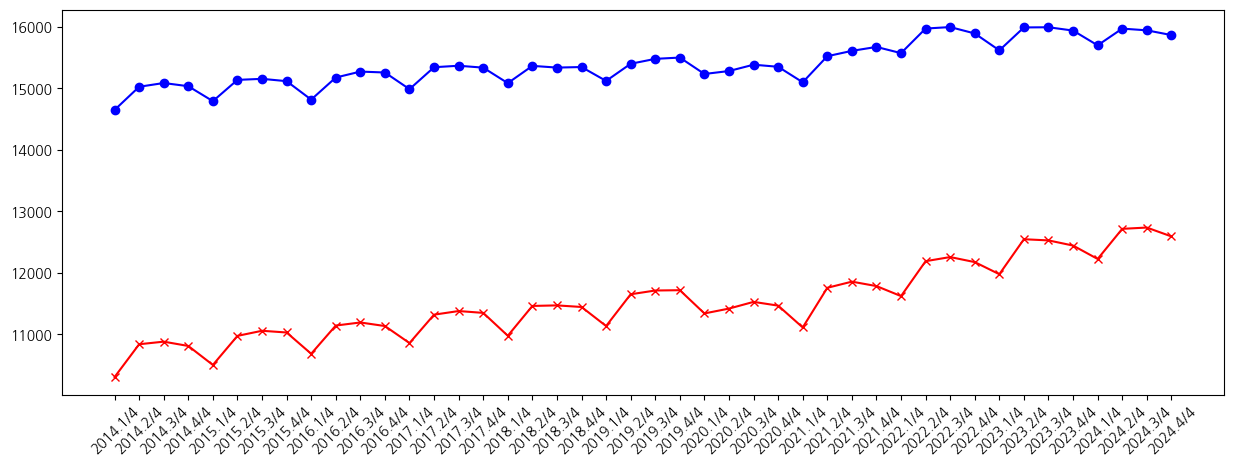

In [14]:
plt.figure(figsize=(15,5))
plt.plot(male['year'],male['total'],label='남자',color="blue",linestyle='-', marker='o')
plt.plot(male['year'],female['total'],label='남자',color="red",linestyle='-', marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

------------------------------------------------------
- 연습문제 스터디 조원별로 나눠풀기
- 연령별취업자수관계 데이터를 이용해서 팀별상의하여 의미있는 인사이트 도출하기(1가지만)

In [15]:
# p144 Chapter 2.4 연습문제 

In [16]:
# 20250406 23번째 수업이라고요 ??!!! 헉 믿을 수 없어 그치만 이게 참혹한 현실 . . .

In [17]:
ex3_data = ori.copy()  # 세종시 값이 있었기 때문에 ..!!!! ㅂㄷㅂㄷ 세종시
ex3_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].replace("-",0).astype(int) # 새로운 문법을 외워주자! .loc[행,열] !!!

In [18]:
filter0 = (ex3_data['시점']>= "2018.1/4") & (ex3_data['시점']<= "2018.4/4") # bool 연산할 때는 & !!
filter0  # 필터를 미리 실행시켜서 검증해본다 !

0       False
1       False
2       False
3       False
4       False
        ...  
7435    False
7436    False
7437    False
7438    False
7439    False
Name: 시점, Length: 7440, dtype: bool

In [19]:
ex3_data=ex3_data[filter0]  # 예 아니오로 끝날 수 있는 함수는 필터연산을 사용할 수 있다 !!
ex3_data

,시도별,시점,연령계층별,성별,데이터
160,서울특별시,2018.1/4,20 - 29세,남자,339
161,서울특별시,2018.1/4,20 - 29세,여자,477
162,서울특별시,2018.1/4,30 - 39세,남자,693
163,서울특별시,2018.1/4,30 - 39세,여자,513
164,서울특별시,2018.1/4,40 - 49세,남자,719
...,...,...,...,...,...
7195,제주도,2018.4/4,40 - 49세,여자,42
7196,제주도,2018.4/4,50 - 59세,남자,47
7197,제주도,2018.4/4,50 - 59세,여자,40
7198,제주도,2018.4/4,60세이상,남자,37


In [20]:
x_data = ex3_data[ex3_data['연령계층별'].isin(['20 - 29세'])]  # isin 뒤도 list(배열)에 넣어주자~
                                            # ㄴ 컬럼 이름은 그냥 복사 붙여넣기 하자 !!! 그냥 쓰면 틀릴 가능성이 있음 !!
y_data = ex3_data[ex3_data['연령계층별'].isin(['60세이상'])]
z_data = ex3_data
# x_data.loc[:,'데이터']=x_data.loc[:,'데이터'].astype(int)
# y_data.loc[:,'데이터']=y_data.loc[:,'데이터'].astype(int)
# z_data.loc[:,'데이터']=ex3_data.loc[:,'데이터'].astype(int)

x= x_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 20대 취업자
y= y_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 60대(정년퇴임) 취업자
z = ex3_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 전체 취업자 수

In [28]:
ex4_data = ori.copy()

In [ ]:
ex4_data.loc[:,'데이터'] = ex4_data.loc[:,'데이터'].replace("-",0).astype(int)
filter0 = (ex4_data['시점']>= "2024.1/4") & (ex4_data['시점']<= "2024.4/4")
ex4_data=ex4_data[filter0]

In [ ]:
# ctrl + shift + D 하면 셀 내의 같은 글자만 잘 찾아짐 !!! 기억하자 !!!

In [33]:
q_data = ex4_data[ex4_data['연령계층별'].isin(['20 - 29세'])]
w_data = ex4_data[ex4_data['연령계층별'].isin(['60세이상'])]
e_data = ex4_data

q= q_data.groupby('시도별')['데이터'].sum()
w= w_data.groupby('시도별')['데이터'].sum()
e = ex4_data.groupby('시도별')['데이터'].sum()

In [21]:
import numpy as np
regions = list(x.index)  # 라벨
color = [np.random.rand(3,) for _ in range(len(regions))] # 색의 수를 regions의 길이만큼 다양하게 바꿔줘!!

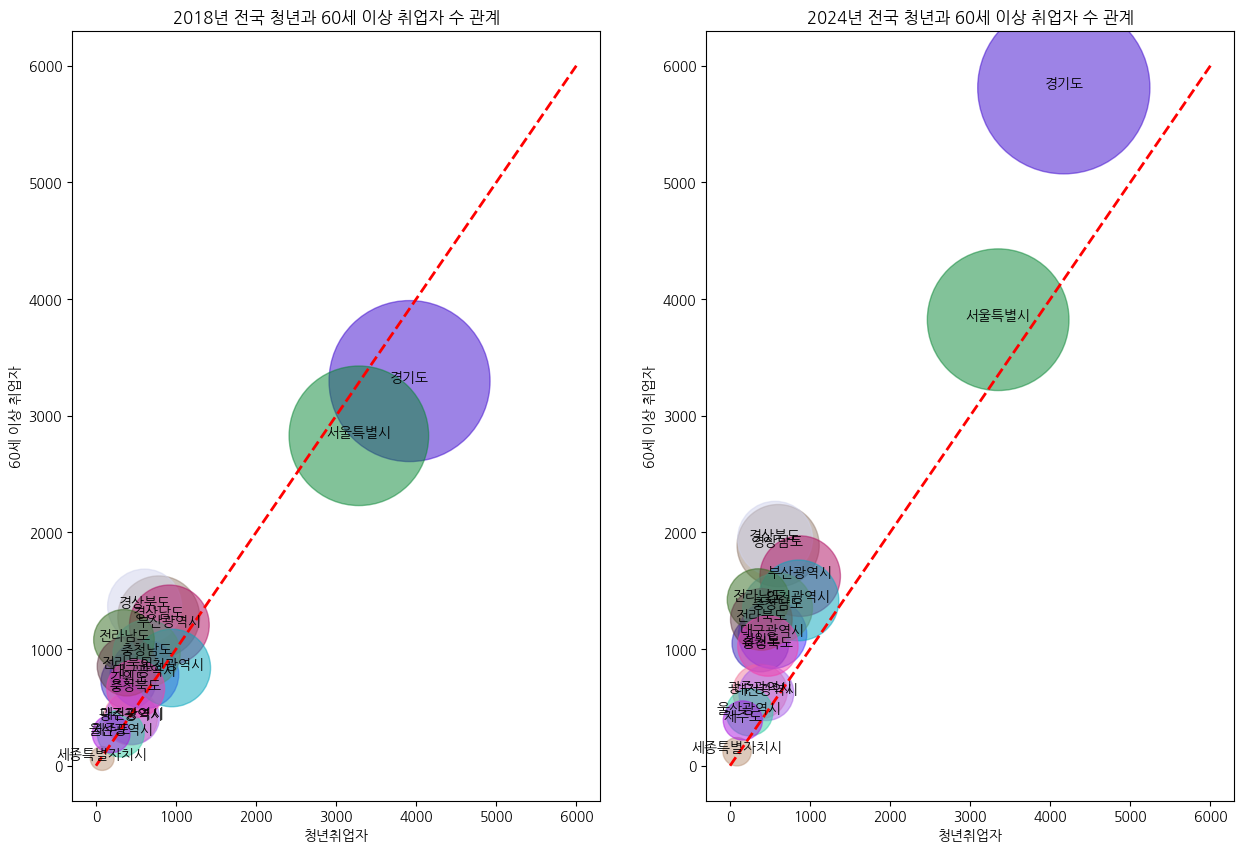

In [46]:
fig , ax = plt.subplots(1,2,figsize=(15,10))
z = np.array(z,dtype=float)
e = np.array(e,dtype=float)
scatter = ax[0].scatter(x,y,s=z*0.5,c=color, alpha=0.5)  # z 가 들어가면 점의 크기까지 조절할 수 있다 !!
scatter = ax[1].scatter(q,w,s=e*0.5,c=color, alpha=0.5)


ax[0].set_title("2018년 전국 청년과 60세 이상 취업자 수 관계")
ax[0].set_xlabel("청년취업자")
ax[0].set_ylabel("60세 이상 취업자")

ax[1].set_title("2024년 전국 청년과 60세 이상 취업자 수 관계")
ax[1].set_xlabel("청년취업자")
ax[1].set_ylabel("60세 이상 취업자")

ax[0].plot([0,6000],[0,6000], color="r", linestyle="--",linewidth=2)
ax[1].plot([0,6000],[0,6000], color="r", linestyle="--",linewidth=2)

for n in range(len(regions)):
    ax[0].annotate(regions[n],xy=(x.iloc[n],y.iloc[n]),ha="center")  # 원에 라벨링 하는 작업 !!
    ax[1].annotate(regions[n],xy=(q.iloc[n],w.iloc[n]),ha="center")




plt.show()

In [ ]:
# 2024년 전국 청년과 60세 이상 취업자 수 관계 분석하기.
  # + prophet을 이용하여 향후 10년간의 취업 추이 예측 !!

In [56]:
from prophet import Prophet
# from .autonotebook import tqdm as notebook_tqdm

In [80]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다.
ex5_data = ori.copy()
ex5_data.loc[:,'데이터'] = ex5_data.loc[:,'데이터'].replace("-",0).astype(int)
ex5_data.loc[:,'시점'] = ex5_data.loc[:,'시점'].str.replace(".1/4","-3").str.replace(".2/4","-6").str.replace(".3/4","-9").str.replace(".4/4","-12")
ex5_data['시점'] = pd.to_datetime(ex5_data['시점'])
ex5_data

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014-03-01,20 - 29세,남자,331
1,서울특별시,2014-03-01,20 - 29세,여자,460
2,서울특별시,2014-03-01,30 - 39세,남자,774
3,서울특별시,2014-03-01,30 - 39세,여자,519
4,서울특별시,2014-03-01,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024-12-01,40 - 49세,여자,44
7436,제주도,2024-12-01,50 - 59세,남자,54
7437,제주도,2024-12-01,50 - 59세,여자,47
7438,제주도,2024-12-01,60세이상,남자,49


In [83]:
filter_b = ex5_data['시도별']=='부산광역시'
ex5_data[filter_b]


,시도별,시점,연령계층별,성별,데이터
440,부산광역시,2014-03-01,20 - 29세,남자,96
441,부산광역시,2014-03-01,20 - 29세,여자,121
442,부산광역시,2014-03-01,30 - 39세,남자,221
443,부산광역시,2014-03-01,30 - 39세,여자,129
444,부산광역시,2014-03-01,40 - 49세,남자,247
...,...,...,...,...,...
875,부산광역시,2024-12-01,40 - 49세,여자,152
876,부산광역시,2024-12-01,50 - 59세,남자,218
877,부산광역시,2024-12-01,50 - 59세,여자,180
878,부산광역시,2024-12-01,60세이상,남자,215


In [81]:
m= Prophet()
m.fit(ex5_data)  # fit은 트레이닝 시켜주는 것 !

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

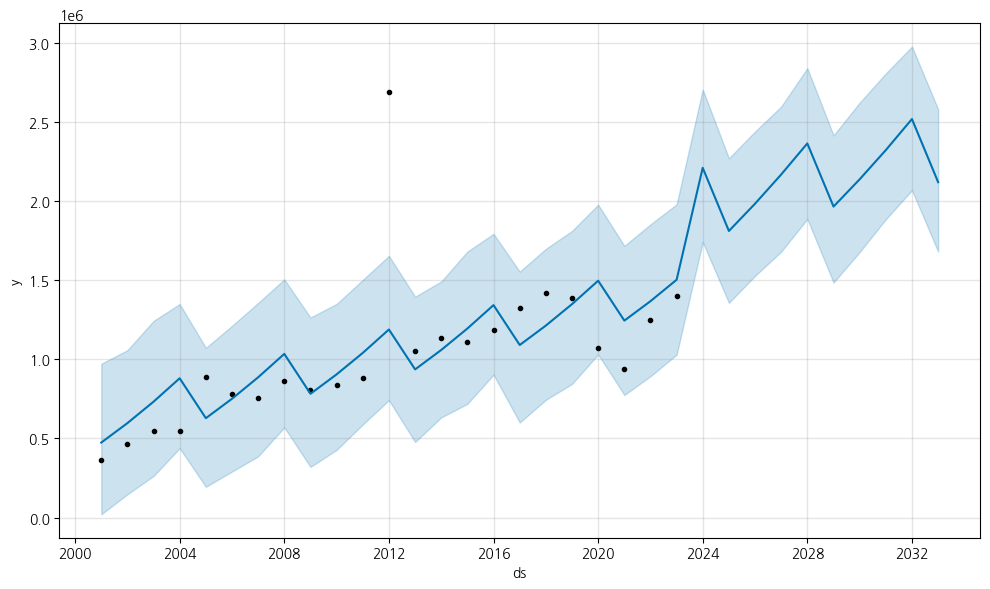

<Figure size 1000x1500 with 0 Axes>

In [52]:
future = m.make_future_dataframe(periods=10,freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)   # fit 한 값을 토대로 predict 하는 것 !!
fig1 = m.plot(forecast)
plt.figure(figsize=(10,15))
plt.show()  # 미래를... 예측하는... 그래프 ~~!

In [ ]:
x_data = ex3_data[ex3_data['연령계층별'].isin(['20 - 29세'])]
y_data = ex3_data[ex3_data['연령계층별'].isin(['60세이상'])]
z_data = ex3_data
x= x_data.groupby('시도별')['데이터'].sum()
y= y_data.groupby('시도별')['데이터'].sum()
z = ex3_data.groupby('시도별')['데이터'].sum()